# Geographic data 

Notebook to represent the geographic data after the gender classification

In [1]:
#set_styax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import geopandas as gp
import re
from shapely.geometry import Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'S':
        dd *= -1
    return dd;

In [3]:
sns.set_style('white', {'axes.edgecolor':'1','xtick.color': 'white',
 'ytick.color': 'white'})

In [4]:
data_path = '../Data/'
yr = '2020'
t='CH'

In [5]:
# Taken from https://github.com/jschleuss/mexican-states
mex = gp.read_file('../Data/MexicanStates/mexican-states.shp')

In [6]:
GeoINEGIr = pd.read_csv(data_path+'/ClavesGeoINEGI.csv')
GeoINEGI = GeoINEGIr.copy()

In [29]:
#Read ENIGH clean data
ENIGHr = pd.read_csv(data_path+'/DataYearGenderClassification/ENIGH_'+t+yr+'.csv',
                         index_col=[0])
ENIGHr = ENIGHr.astype({'ubica_geo':str})
ENIGH = ENIGHr.copy()

In [30]:
ENIGH = ENIGH[~ENIGH.index.duplicated(keep='first')]

In [31]:
Estados = list()
for i in range(0,len(ENIGH)):
    if len(ENIGH.iloc[i].ubica_geo)==4:
        E = ENIGH.iloc[i].ubica_geo[0]
    elif len(ENIGH.iloc[i].ubica_geo)==5:
        E = ENIGH.iloc[i].ubica_geo[:2]
    Estados.append(int(E))
Estados = np.array(Estados)

In [32]:
ENIGH['Estados'] = Estados
ENIGH['Municipios'] = ENIGH.ubica_geo.str.strip().str[-3:]
ENIGH['Municipios'] = ENIGH.Municipios.astype(int)
Municipios = np.array(ENIGH.Municipios)

In [33]:
Latitudes = list()
Longitudes = list()
for i in range(0,len(ENIGH)):
    E = Estados[i]
    M = Municipios[i]
    Ubicaciones = GeoINEGI[(GeoINEGI['Clave de AGEE']==E) & 
                           (GeoINEGI['Clave de AGEM']==M)].iloc[0][['Latitud','Longitud']]
    

    lat = Ubicaciones['Latitud']
    coord = re.split('[°\'N]', lat)
    lat = dms2dd(coord[0],coord[1],coord[2],'N')
        
    lon = Ubicaciones['Longitud']
    coord = re.split('[°\'W]', lon)
    lon = (-1)*dms2dd(coord[0],coord[1],coord[2],'W')
    
    Latitudes.append(lat)
    Longitudes.append(lon)

In [34]:
ENIGH['Latitude'] = Latitudes
ENIGH['Longitude'] = Longitudes

In [40]:
gdf = gp.GeoDataFrame(ENIGH,
                            geometry=gp.points_from_xy(
                                ENIGH.Longitude,ENIGH.Latitude))

In [43]:
gdf.sexo_jefe.replace({1:'Hombre',2:'Mujer'}, inplace=True)

In [45]:
Adultos = gdf[(gdf.node=='HAdultos')|(gdf.node=='MAdultos')]
AdultosMenores = gdf[(gdf.node=='HAdultosMenores')|(gdf.node=='MAdultosMenores')]
AdultosMayores = gdf[(gdf.node=='HAdultosMayores')|(gdf.node=='MAdultosMayores')]
MayoresMenores = gdf[(gdf.node=='HMayoresMenores')|(gdf.node=='MMayoresMenores')]
Mayores = gdf[(gdf.node=='HMayores')|(gdf.node=='MMayores')]
AdultosMayoresMenores = gdf[(gdf.node=='HAdultosMayoresMenores')|(gdf.node=='MAdultosMayoresMenores')]

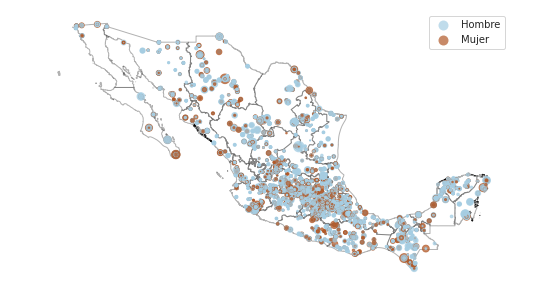

In [46]:
f = plt.figure(figsize=(10,5))
f.subplots_adjust(hspace=0.2)
fontsize_ticks = 10
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

mex.plot(color='white',edgecolor='black',ax=ax, alpha=0.3,
        cax=cax)
ax.tick_params(labelsize=10)

markersize=gdf.energia/300

Adultos.plot(ax=ax, column='sexo_jefe', cmap='Paired',
                           legend=True, markersize=markersize, 
                           alpha=0.7, categorical=True)

plt.savefig('../Figures/Map_Adultos.png', bbox_inches='tight', dpi=600)

plt.show()

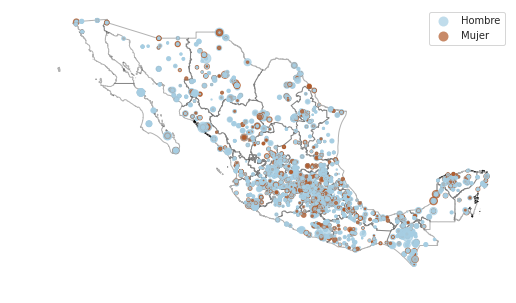

In [28]:
f = plt.figure(figsize=(10,5))
f.subplots_adjust(hspace=0.2)
fontsize_ticks = 10
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])

#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)

mex.plot(color='white',edgecolor='black',ax=ax, alpha=0.3,
        cax=cax)
ax.tick_params(labelsize=10)

markersize=gdf.energia/300

AdultosMenores.plot(ax=ax, column='sexo_jefe', cmap='Paired',
                           legend=True, markersize=markersize, 
                           alpha=0.7, categorical=True)

plt.savefig('../Figures/Map_AdultosMenores.png', bbox_inches='tight', dpi=600)

plt.show()

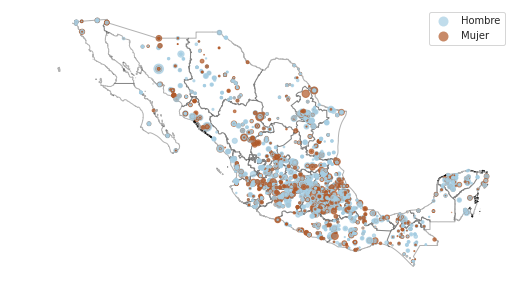

In [29]:
f = plt.figure(figsize=(10,5))
f.subplots_adjust(hspace=0.2)
fontsize_ticks = 10
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])

#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)

mex.plot(color='white',edgecolor='black',ax=ax, alpha=0.3,
        cax=cax)
ax.tick_params(labelsize=10)

markersize=gdf.energia/300

AdultosMayores.plot(ax=ax, column='sexo_jefe', cmap='Paired',
                           legend=True, markersize=markersize, 
                           alpha=0.7, categorical=True)

plt.savefig('../Figures/Map_AdultosMayores.png', bbox_inches='tight',dpi=600)

plt.show()

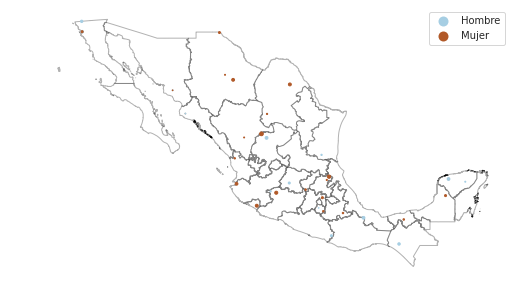

In [30]:
f = plt.figure(figsize=(10,5))
f.subplots_adjust(hspace=0.2)
fontsize_ticks = 10
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])

#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)

mex.plot(color='white',edgecolor='black',ax=ax, alpha=0.3,
        cax=cax)
ax.tick_params(labelsize=10)

markersize=gdf.energia/300

MayoresMenores.plot(ax=ax, column='sexo_jefe', cmap='Paired',
                           legend=True, markersize=markersize, 
                           alpha=1, categorical=True)

plt.savefig('../Figures/Map_MayoresMenores.png', bbox_inches='tight',dpi=600)

plt.show()

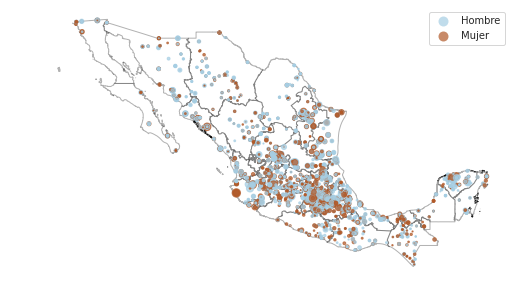

In [31]:
f = plt.figure(figsize=(10,5))
f.subplots_adjust(hspace=0.2)
fontsize_ticks = 10
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])

#divider = make_axes_locatable(ax)
#cax = divider.append_axes("right", size="5%", pad=0.1)

mex.plot(color='white',edgecolor='black',ax=ax, alpha=0.3,
        cax=cax)
ax.tick_params(labelsize=10)

markersize=gdf.energia/300

Mayores.plot(ax=ax, column='sexo_jefe', cmap='Paired',
                           legend=True, markersize=markersize, 
                           alpha=0.7, categorical=True)

plt.savefig('../Figures/Map_Mayores.png', bbox_inches='tight',dpi=600)

plt.show()

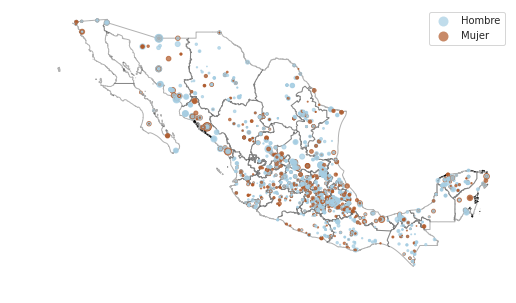

In [32]:
f = plt.figure(figsize=(10,5))
f.subplots_adjust(hspace=0.2)
fontsize_ticks = 10
gs = gridspec.GridSpec(1,1)
ax = plt.subplot(gs[0])

mex.plot(color='white',edgecolor='black',ax=ax, alpha=0.3,
        cax=cax)
ax.tick_params(labelsize=10)

markersize=gdf.energia/300

AdultosMayoresMenores.plot(ax=ax, column='sexo_jefe', cmap='Paired',
                           legend=True, markersize=markersize, 
                           alpha=0.7, categorical=True)

plt.savefig('../Figures/Map_AdultosMayoresMenores.png', bbox_inches='tight',dpi=600)

plt.show()